## Key Metrics

* **High-Rated Content**:
    * Percentage of platform library titles with IMDb ≥ 7.5 for each platform.
    * This metric is likely the most important factor in determining platform value, as your research focuses on content quality (IMDb ≥ 7.5). A higher percentage of high-rated content indicates better value for consumers, so this should carry significant weight.
    * Suggested weight: 35%
    * Reason: Quality content is one of the most critical elements when assessing the value of streaming platforms.


* **Filler-Content**:
    * Percentage of titles found in IMDb’s bottom 1000-rated titles list (>10k votes).
    * Filler content (low-rated titles) can detract from platform value. However, compared to high-rated content, it’s less critical to the user experience. While you don't want platforms to have too much filler, this is secondary to content quality
    * Suggested weight: 5%
    * Reason: While important, it plays a smaller role in assessing the platform's overall value. High-rated content should still take priority.

* **Availability**:
    *  Percentage of titles found in IMDb’s top-rated list (>10k votes and >7.5 rating).
    * This metric measures how much content is available across the platform. Availability affects consumer choice, and a wide variety of titles is important, but high-rated and exclusive content are likely more valuable than simply having a large number of titles.
    * Suggested weight: 12%
    * Reason: Availability is important but should not outweigh content quality or exclusivity.

* **Exclusivity**:
    *  Identify unique titles by platform, including their average rating.
    * Exclusivity is a key differentiator among platforms, especially for platforms with unique content. Exclusive titles tend to draw more subscribers and provide a competitive advantage, especially when those titles are high-rated.
    * Suggested weight: 13%
    * Reason: Exclusivity adds significant value, but it shouldn't overshadow content quality and availability. Still, it's crucial in distinguishing platforms from each other.

* **Overlap**:
    * Measure shared titles among platforms.
    * Overlap measures the shared content among platforms. While high overlap might reduce a platform's distinctiveness, its impact on consumer choice isn’t as critical as high-rated or exclusive content. However, platforms with lower overlap may have an advantage in terms of offering unique content.
    * Suggested weight: 8%
    * Reason: Important for understanding the diversity between platforms, but it’s less important than other factors like quality and exclusivity.

* **Cost-Effectiveness**:
    * Compute the cost-per-high-rated-title metric.
    * Cost-effectiveness is a crucial factor, as consumers care about getting good value for their subscription. The metric could be based on the cost per high-rated title, and a lower cost for better content is a major selling point.
    * Suggested weight: 18%
    * Reason: It’s an important factor for consumer decision-making, especially for price-conscious users. A great platform at a reasonable price has a strong competitive advantage.

* **Cancellation Rate Comparison**:
    * Correlate cancellation rates with platform metrics such as subscription price and content quality.
    * The cancellation rate may reflect dissatisfaction with content or service. This is important for measuring consumer retention and platform quality, but it’s secondary to factors like content and cost-effectiveness. However, if cancellation rates are high, it might indicate a problem with overall satisfaction.
    * Suggested weight: 7%
    * Reason: It’s a useful indicator but doesn’t directly affect platform ranking unless there’s a significant discrepancy in cancellation rates.

* **Relative Exclusivity**
    * Instead of binary exclusivity (unique vs. not unique), titles will be categorized based on the number of platforms they are available on. Titles available on only two platforms will be categorized as "semi-exclusive," for example.
    * Relative exclusivity assesses how unique a platform’s content is based on the number of platforms the content is available on. This could be an important metric for platforms that aim to stand out by offering content unavailable elsewhere. 
    * Suggested weight: 7%
    *Reason: This metric adds value in determining how much exclusive content a platform offers, but it’s less important than content quality or price.

* **Genre-Specific Analysis** 
    * If time permits, analyze high-rated or exclusive content by genre to understand if certain platforms dominate specific niches (e.g., documentaries, sci-fi).

##  Load dataframes and imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataframes

# platform_info
platform_info = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\final_df.csv")

# imdb_top
imdb_top = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\imdb_top.csv")

# imdb_bottom
imdb_bottom = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\imdb_bottom.csv")

# cancellation_rates
cancellation_rates = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\cancellation_rates.csv")

# streaming_costs
streaming_costs = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\streaming_costs.csv")


In [ ]:
# Set up comparison
comparison_df = pd.DataFrame(columns=['Platform', 'Number of US Titles', 'US Percentage'])

Make seperate df for each platform

In [3]:
# Add 'exclusivity' column by summing the platform availability columns
platform_info['exclusivity'] = platform_info[['Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']].sum(axis=1)

# Check the first few rows to ensure 'exclusivity' column is added correctly
print(platform_info[['imdbId', 'title', 'exclusivity', 'Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']].head())

# Now filter the rows for each platform where the platform column is 1
amazon_df = platform_info[platform_info['Amazon'] == 1].copy()
hulu_df = platform_info[platform_info['Hulu'] == 1].copy()
netflix_df = platform_info[platform_info['Netflix'] == 1].copy()
apple_df = platform_info[platform_info['Apple'] == 1].copy()
hbo_df = platform_info[platform_info['HBO'] == 1].copy()


      imdbId                 title  exclusivity  Amazon  Hulu  Netflix  Apple  \
0  tt0000417    A Trip to the Moon            3       1     0        0      1   
1  tt0000499  An Impossible Voyage            1       0     0        0      0   
2  tt0002646              Atlantis            1       1     0        0      0   
3  tt0003014         Ingeborg Holm            1       0     0        1      0   
4  tt0004181    Judith of Bethulia            1       1     0        0      0   

   HBO  
0    1  
1    1  
2    0  
3    0  
4    0  


In [4]:
# Define platform names and their corresponding data
platforms = {
    'Amazon': amazon_df,
    'Apple': apple_df,
    'HBO': hbo_df,
    'Hulu': hulu_df,
    'Netflix': netflix_df
}

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 3 to 87194
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdbId           18182 non-null  object 
 1   title            18182 non-null  object 
 2   releaseYear      18182 non-null  int64  
 3   genres           18182 non-null  object 
 4   type             18182 non-null  object 
 5   rating           18182 non-null  float64
 6   numVotes         18182 non-null  int64  
 7   Amazon           18182 non-null  int64  
 8   Hulu             18182 non-null  int64  
 9   Netflix          18182 non-null  int64  
 10  HBO              18182 non-null  int64  
 11  Apple            18182 non-null  int64  
 12  Action           18182 non-null  int64  
 13  Adventure        18182 non-null  int64  
 14  Animation        18182 non-null  int64  
 15  Biography        18182 non-null  int64  
 16  Comedy           18182 non-null  int64  
 17  Crime            

In [6]:
platform_info.head()


,imdbId,title,releaseYear,genres,type,rating,numVotes,Amazon,Hulu,Netflix,...,Romance,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western,exclusivity
0,tt0000417,A Trip to the Moon,1902,"['Adventure', 'Comedy', 'Fantasy']",Movie,8.1,57365,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,tt0000499,An Impossible Voyage,1904,"['Action', 'Adventure', 'Family']",Movie,7.5,4153,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,tt0002646,Atlantis,1913,['Drama'],Movie,6.5,502,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,tt0003014,Ingeborg Holm,1913,['Drama'],Movie,7.0,1479,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,tt0004181,Judith of Bethulia,1914,['Drama'],Movie,6.2,1482,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
cancellation_rates.head(10)


,Platform,Cancellation_Rate_Percentage
0,Max,26.9
1,Broadcast,26.6
2,Disney,21.1
3,Paramount+,16.9
4,Hulu,15.2
5,Netflix,10.2
6,Peacock,10.0
7,Prime Video,9.0
8,Cable,7.2
9,Apple TV,4.9


In [8]:
streaming_costs.head(10)


,Platform,Price_Per_Month
0,Netflix,15.49
1,Hulu,17.99
2,Amazon Prime,14.97
3,Apple TV,9.99
4,Max,16.99


#  **High-Rated Content**:

* Percentage of platform library titles with IMDb ≥ 7.5 for each platform.
* This metric is likely the most important factor in determining platform value, as your research focuses on content quality (IMDb ≥ 7.5). A higher percentage of high-rated content indicates better value for consumers, so this should carry significant weight.
* Suggested weight: 35%
* Reason: Quality content is one of the most critical elements when assessing the value of streaming platforms.

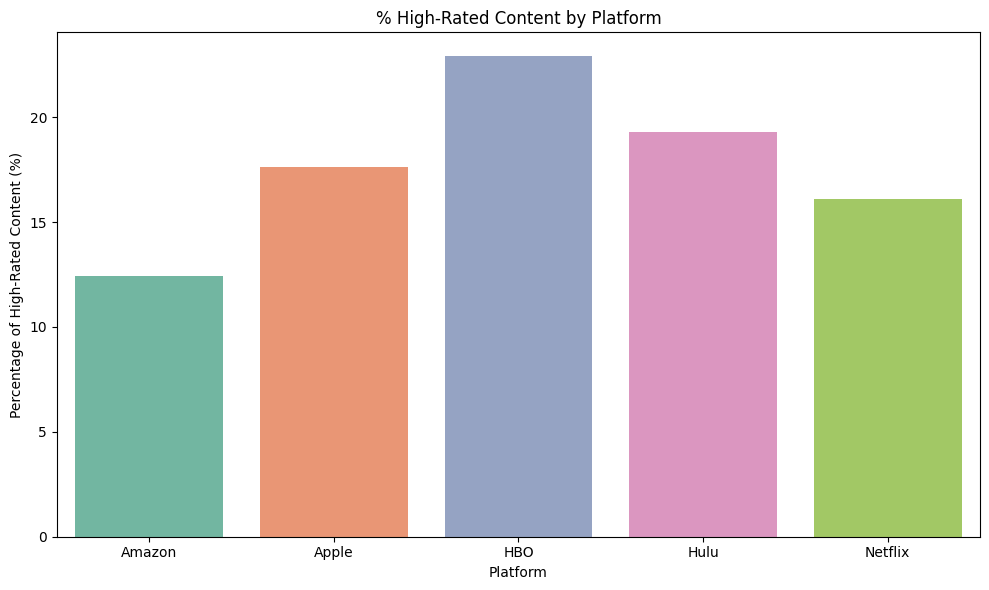

In [9]:
# Function to calculate high-rated content percentage
def calculate_high_rated_content_percentage(df):
    high_rated = df[df['rating'] >= 7.5]
    return len(high_rated) / len(df) * 100

# Calculate high-rated content percentage for each platform
high_rated_percentages = {platform: calculate_high_rated_content_percentage(df) for platform, df in platforms.items()}

# Visualization of high-rated content percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(high_rated_percentages.keys()), y=list(high_rated_percentages.values()), palette='Set2', hue=list(high_rated_percentages.keys()))
plt.title('% High-Rated Content by Platform')
plt.ylabel('Percentage of High-Rated Content (%)')
plt.xlabel('Platform')
plt.tight_layout()
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\high_rated_content_percentage.png')
plt.show()




# **Filler-Content**:
* Percentage of titles found in IMDb’s bottom 1000-rated titles list (>10k votes).
* Filler content (low-rated titles) can detract from platform value. However, compared to high-rated content, it’s less critical to the user experience. While you don't want platforms to have too much filler, this is secondary to content quality
* Suggested weight: 5%
* Reason: While important, it plays a smaller role in assessing the platform's overall value. High-rated content should still take priority.

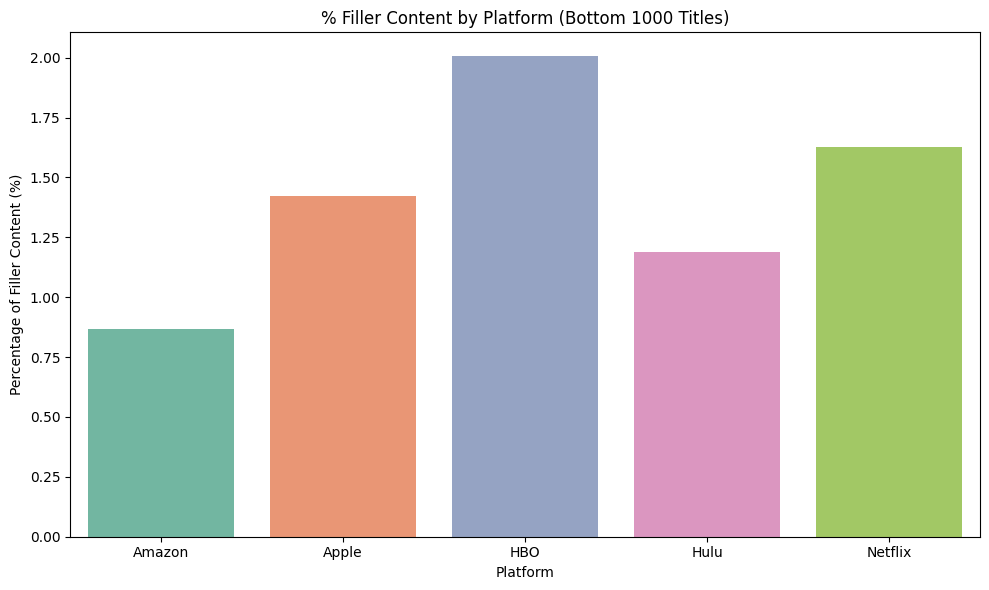

In [10]:
# Function to calculate filler content percentage
def calculate_filler_content_percentage(df, imdb_bottom):
    filler_titles = imdb_bottom[imdb_bottom['imdbId'].isin(df['imdbId'])]
    return len(filler_titles) / len(df) * 100

# Calculate filler content percentage for each platform
filler_percentages = {platform: calculate_filler_content_percentage(df, imdb_bottom) for platform, df in platforms.items()}

# Visualization of filler content percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(filler_percentages.keys()), y=list(filler_percentages.values()), palette='Set2', hue= list(filler_percentages.keys()))
plt.title('% Filler Content by Platform (Bottom 1000 Titles)')
plt.ylabel('Percentage of Filler Content (%)')
plt.xlabel('Platform')
plt.tight_layout()
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\filler_content_percentage.png')
plt.show()

# **Availability**:
* Percentage of titles found in IMDb’s top-rated list (>10k votes and >7.5 rating).
* This metric measures how much content is available across the platform. Availability affects consumer choice, and a wide variety of titles is important, but high-rated and exclusive content are likely more valuable than simply having a large number of titles.
* Suggested weight: 12%
* Reason: Availability is important but should not outweigh content quality or exclusivity.

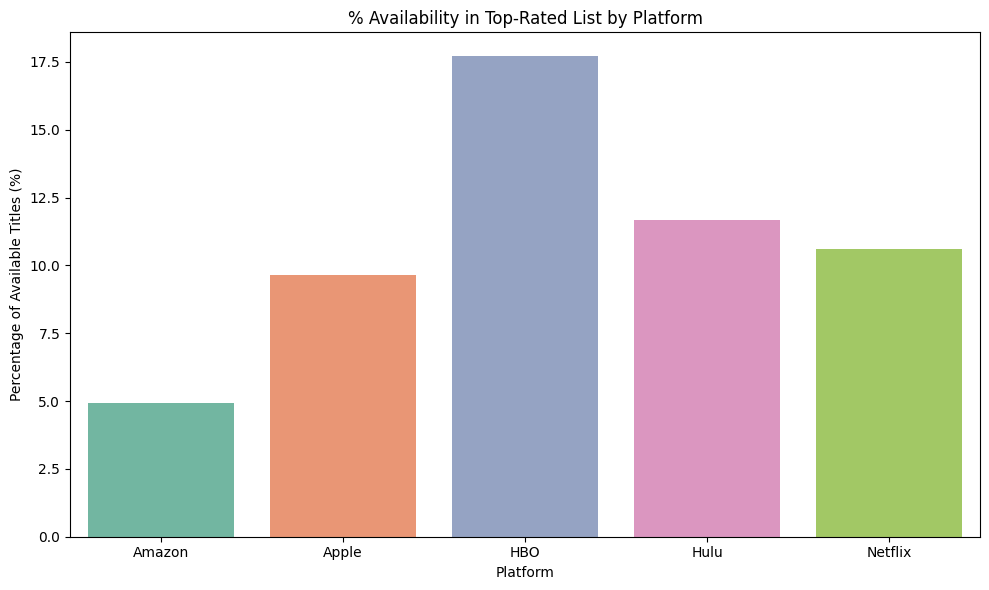

In [11]:
# Function to calculate availability percentage in top-rated list
def calculate_availability_percentage(df, imdb_top):
    available_titles = imdb_top[imdb_top['imdbId'].isin(df['imdbId'])]
    return len(available_titles) / len(df) * 100

# Calculate availability percentage for each platform
availability_percentages = {platform: calculate_availability_percentage(df, imdb_top) for platform, df in platforms.items()}

# Visualization of availability percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(availability_percentages.keys()), y=list(availability_percentages.values()), palette='Set2', hue=list(availability_percentages.keys()))
plt.title('% Availability in Top-Rated List by Platform')
plt.ylabel('Percentage of Available Titles (%)')
plt.xlabel('Platform')
plt.tight_layout()
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\availability_percentage.png')
plt.show()

# **Exclusivity**:
*  Identify unique titles by platform, including their average rating.
* Exclusivity is a key differentiator among platforms, especially for platforms with unique content. Exclusive titles tend to draw more subscribers and provide a competitive advantage, especially when those titles are high-rated.
* Suggested weight: 13%
* Reason: Exclusivity adds significant value, but it shouldn't overshadow content quality and availability. Still, it's crucial in distinguishing platforms from each other.

Index(['Platform', 'Number of US Titles', 'US Percentage', '% Exclusivity'], dtype='object')


C:\Users\kimbe\AppData\Local\Temp\ipykernel_31368\3337841619.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='% Exclusivity', data=comparison_data, palette='Set2')


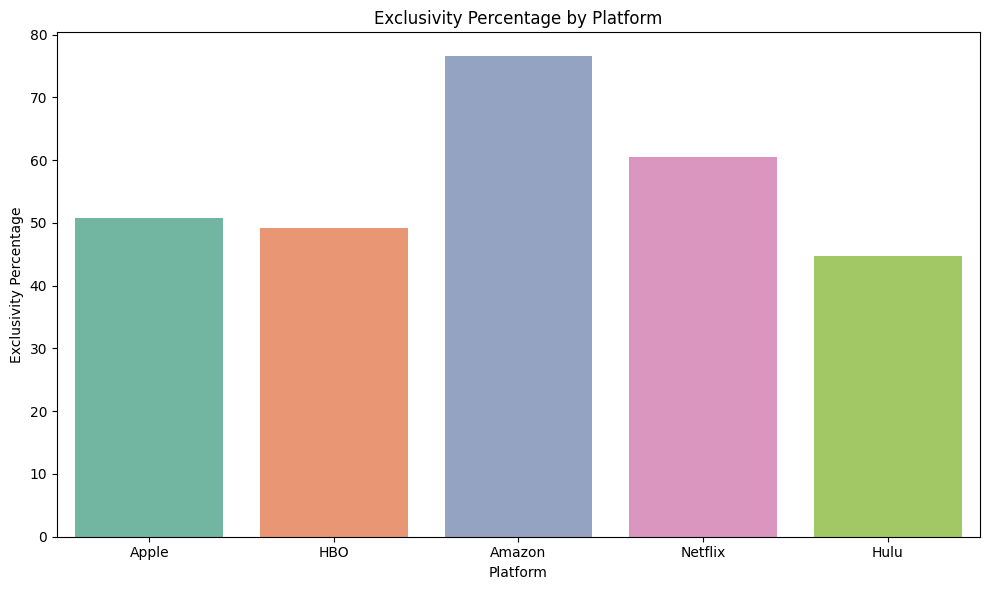

In [14]:
# Define the function to calculate exclusivity and average rating for exclusive titles
def exclusivity_analysis(platform_df, platform_name):
    # Identify exclusive titles: Titles with exclusivity value of 1 (available only on this platform)
    exclusive_titles = platform_df[platform_df['exclusivity'] == 1]
    
    # Calculate the average IMDb rating of exclusive titles
    avg_rating = exclusive_titles['rating'].mean() if not exclusive_titles.empty else 0
    
    # Calculate exclusivity percentage (based on exclusive titles vs total titles on the platform)
    exclusivity_percentage = len(exclusive_titles) / len(platform_df) * 100 if len(platform_df) > 0 else 0
    
    return {
        'platform': platform_name,
        'exclusive_titles_count': len(exclusive_titles),
        'average_rating': avg_rating,
        'exclusivity_percentage': exclusivity_percentage
    }

# Apply the exclusivity analysis to each platform
amazon_exclusivity = exclusivity_analysis(amazon_df, 'Amazon')
hulu_exclusivity = exclusivity_analysis(hulu_df, 'Hulu')
netflix_exclusivity = exclusivity_analysis(netflix_df, 'Netflix')
apple_exclusivity = exclusivity_analysis(apple_df, 'Apple')
hbo_exclusivity = exclusivity_analysis(hbo_df, 'HBO')

# Store exclusivity percentages in a dictionary for comparison
exclusivity_percentages = {
    'Amazon': amazon_exclusivity['exclusivity_percentage'],
    'Hulu': hulu_exclusivity['exclusivity_percentage'],
    'Netflix': netflix_exclusivity['exclusivity_percentage'],
    'Apple': apple_exclusivity['exclusivity_percentage'],
    'HBO': hbo_exclusivity['exclusivity_percentage']
}

# Convert exclusivity_percentages dictionary to a DataFrame
exclusivity_df = pd.DataFrame(list(exclusivity_percentages.items()), columns=['Platform', '% Exclusivity'])

# Merge with comparison_data (if comparison_data exists and has platform information)
comparison_data = comparison_data.merge(exclusivity_df, on='Platform', how='left')

# Check the column names in the comparison_data DataFrame to verify
print(comparison_data.columns)


plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='% Exclusivity', data=comparison_data, palette='Set2')
plt.title('Exclusivity Percentage by Platform')
plt.xlabel('Platform')
plt.ylabel('Exclusivity Percentage')
plt.tight_layout()

# Show the plot
plt.show()


# **Overlap**:
* Measure shared titles among platforms.
* Overlap measures the shared content among platforms. While high overlap might reduce a platform's distinctiveness, its impact on consumer choice isn’t as critical as high-rated or exclusive content. However, platforms with lower overlap may have an advantage in terms of offering unique content.
* Suggested weight: 8%
* Reason: Important for understanding the diversity between platforms, but it’s less important than other factors like quality and exclusivity.

In [15]:
# Combine all platform data into one DataFrame (considering unique imdbId and title)
all_platforms_df = pd.concat([amazon_df[['imdbId', 'title']], hulu_df[['imdbId', 'title']], 
                              netflix_df[['imdbId', 'title']], apple_df[['imdbId', 'title']], 
                              hbo_df[['imdbId', 'title']]])

# Remove duplicate titles and keep unique titles
unique_titles_df = all_platforms_df.drop_duplicates(subset=['imdbId'])

# Count how many times each title appears across platforms (i.e., check overlap)
title_counts = all_platforms_df['imdbId'].value_counts()

# Identify titles that appear on more than one platform (overlap)
overlap_titles = title_counts[title_counts > 1]

# Calculate the overall overlap percentage
total_unique_titles = len(unique_titles_df)
overlap_percentage = (len(overlap_titles) / total_unique_titles) * 100

# Step 6: Display the results
print(f'Total Unique Titles: {total_unique_titles}')
print(f'Overlap Titles Count: {len(overlap_titles)}')
print(f'Overall Overlap Percentage: {overlap_percentage:.2f}%')

Total Unique Titles: 87195
Overlap Titles Count: 15807
Overall Overlap Percentage: 18.13%


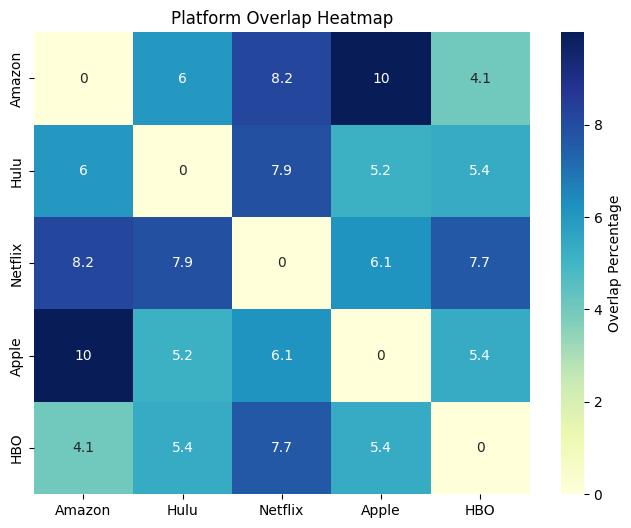

In [16]:
# Create a binary matrix indicating availability of titles on each platform
platform_columns = ['Amazon', 'Hulu', 'Netflix', 'Apple', 'HBO']
binary_overlap_matrix = pd.DataFrame(0.0, index=platform_columns, columns=platform_columns)  # Ensure it's a float matrix

# Calculate overlap percentages and ensure symmetry
for platform_1 in platform_columns:
    for platform_2 in platform_columns:
        if platform_1 != platform_2:
            # Get the sets of titles for each platform
            set_1 = set(eval(f'{platform_1.lower()}_df["imdbId"]'))
            set_2 = set(eval(f'{platform_2.lower()}_df["imdbId"]'))
            
            # Calculate the overlap: number of common titles
            common_titles = set_1.intersection(set_2)
            total_titles = set_1.union(set_2)
            
            # Calculate the overlap percentage
            overlap_percentage = len(common_titles) / len(total_titles) * 100
            
            # Set overlap for both directions (symmetry)
            binary_overlap_matrix.loc[platform_1, platform_2] = float(overlap_percentage)  # Cast to float
            binary_overlap_matrix.loc[platform_2, platform_1] = float(overlap_percentage)  # Ensure symmetry

# Now, plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(binary_overlap_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Overlap Percentage'})
plt.title("Platform Overlap Heatmap")
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\platform_overlap.png')

plt.show()


In [17]:
overlap_percentages = binary_overlap_matrix.stack()
overlap_percentages_sorted = overlap_percentages.sort_values(ascending=False)
print("Platform Pairwise Overlap (sorted):")
print(overlap_percentages_sorted)


Platform Pairwise Overlap (sorted):
Amazon   Apple      9.997063
Apple    Amazon     9.997063
Amazon   Netflix    8.167007
Netflix  Amazon     8.167007
Hulu     Netflix    7.898875
Netflix  Hulu       7.898875
         HBO        7.668991
HBO      Netflix    7.668991
Netflix  Apple      6.132326
Apple    Netflix    6.132326
Hulu     Amazon     6.003697
Amazon   Hulu       6.003697
HBO      Apple      5.368939
Apple    HBO        5.368939
HBO      Hulu       5.357636
Hulu     HBO        5.357636
         Apple      5.179850
Apple    Hulu       5.179850
HBO      Amazon     4.060809
Amazon   HBO        4.060809
         Amazon     0.000000
Hulu     Hulu       0.000000
Netflix  Netflix    0.000000
Apple    Apple      0.000000
HBO      HBO        0.000000
dtype: float64


# **Cost-Effectiveness**:
* Compute the cost-per-high-rated-title metric.
* Cost-effectiveness is a crucial factor, as consumers care about getting good value for their subscription. The metric could be based on the cost per high-rated title, and a lower cost for better content is a major selling point.
* Suggested weight: 18%
* Reason: It’s an important factor for consumer decision-making, especially for price-conscious users. A great platform at a reasonable price has a strong competitive advantage.

C:\Users\kimbe\AppData\Local\Temp\ipykernel_31368\2220075458.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cost_per_high_rated.keys()), y=list(cost_per_high_rated.values()), palette='Oranges')


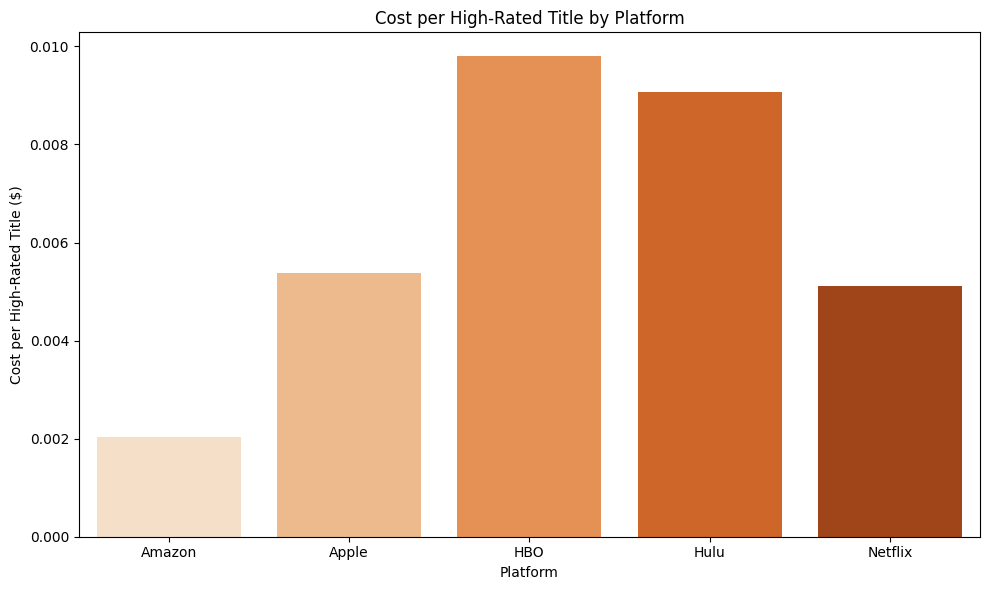

In [18]:
# Function to calculate cost-per-high-rated-title
def calculate_cost_per_high_rated_title(subscription_price, high_rated_count):
    if high_rated_count > 0:
        return subscription_price / high_rated_count
    else:
        return float('inf')  # In case there are no high-rated titles

# Calculate cost-per-high-rated-title for each platform
cost_per_high_rated = {
    platform: calculate_cost_per_high_rated_title(14.99, len(df[df['rating'] >= 7.5]))  # Example subscription price
    for platform, df in platforms.items()
}

# Visualization of cost per high-rated title
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cost_per_high_rated.keys()), y=list(cost_per_high_rated.values()), palette='Oranges')
plt.title('Cost per High-Rated Title by Platform')
plt.ylabel('Cost per High-Rated Title ($)')
plt.xlabel('Platform')
plt.tight_layout()
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\cost_per_high_rated_title.png')
plt.show()


# **Cancellation Rate Comparison**:
* Correlate cancellation rates with platform metrics such as subscription price and content quality.
* The cancellation rate may reflect dissatisfaction with content or service. This is important for measuring consumer retention and platform quality, but it’s secondary to factors like content and cost-effectiveness. However, if cancellation rates are high, it might indicate a problem with overall satisfaction.
* Suggested weight: 7%
* Reason: It’s a useful indicator but doesn’t directly affect platform ranking unless there’s a significant discrepancy in cancellation rates.

C:\Users\kimbe\AppData\Local\Temp\ipykernel_31368\2292945006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cancellation_rates.keys()), y=list(cancellation_rates.values()), palette='coolwarm')


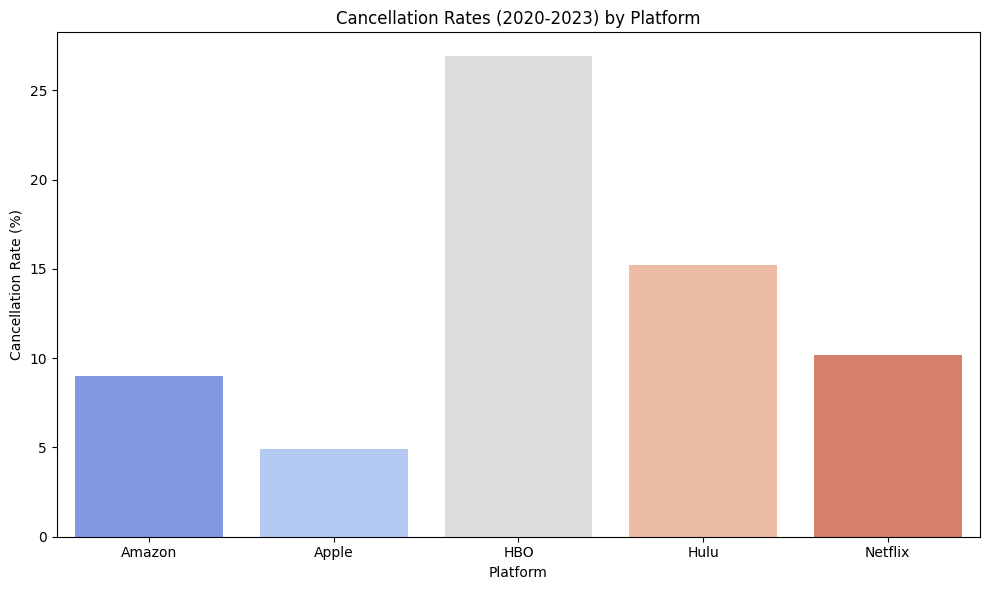

In [19]:
# Sample cancellation rates (replace with actual values)
cancellation_rates = {
    'Amazon': 9.00,
    'Apple': 4.90,
    'HBO': 26.90,
    'Hulu': 15.20,
    'Netflix': 10.20
}

# Visualization of cancellation rates
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cancellation_rates.keys()), y=list(cancellation_rates.values()), palette='coolwarm')
plt.title('Cancellation Rates (2020-2023) by Platform')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Platform')
plt.tight_layout()
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\cancellation_rate.png')
plt.show()


# **Genre-Specific Analysis** 
* If time permits, analyze high-rated or exclusive content by genre to understand if certain platforms dominate specific niches (e.g., documentaries, sci-fi)

   Platform            Genre  Title Count
15   Amazon            Drama         1344
19  Netflix            Drama          862
16    Apple            Drama          710
17      HBO            Drama          574
18     Hulu            Drama          476
5    Amazon           Comedy          460
0    Amazon           Action          350
9   Netflix           Comedy          324
4   Netflix           Action          297
35   Amazon          Romance          258
6     Apple           Comedy          252
8      Hulu           Comedy          208
7       HBO           Comedy          186
3      Hulu           Action          176
2       HBO           Action          152
39  Netflix          Romance          139
1     Apple           Action          135
36    Apple          Romance          123
20   Amazon          Fantasy          106
37      HBO          Romance           97
25   Amazon           Horror           87
38     Hulu          Romance           80
24  Netflix          Fantasy      

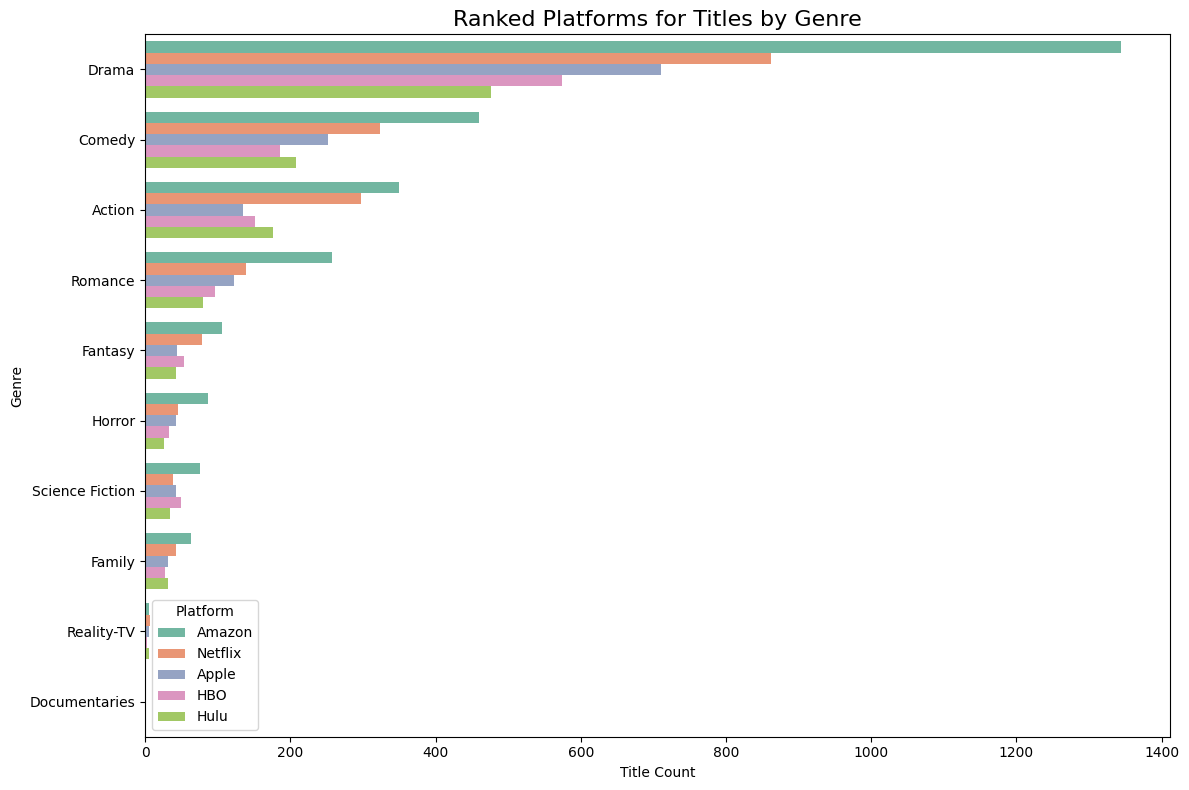

Plot saved to: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\ranked_platform_genres.png


<Figure size 640x480 with 0 Axes>

In [27]:
# Define the list of genres you're interested in
genres = ['Action', 'Comedy', 'Documentaries', 'Drama', 'Fantasy', 'Horror', 'Reality-TV', 'Romance', 'Science Fiction', 'Family']

# Create an empty dictionary to store results
results = []

# Iterate over each genre
for genre in genres:
    # Create an empty dictionary to store the counts for each platform in this genre
    platform_counts = []
    
    # Iterate over each platform's DataFrame
    for platform, df in platforms.items():
        # Filter the data for titles with IMDb rating >= 7.5 and more than 10k votes
        filtered_df = df[(df['rating'] >= 7.5) & (df['numVotes'] > 10000)]
        
        # Filter for the current genre
        genre_df = filtered_df[filtered_df['genres'].str.contains(genre, case=False, na=False)]
        
        # Count the number of titles for this platform and genre
        platform_counts.append({
            'Platform': platform,
            'Genre': genre,
            'Title Count': genre_df.shape[0]
        })
    
    # Add the genre counts to the results list
    results.extend(platform_counts)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by 'Title Count' in descending order to rank platforms
results_df = results_df.sort_values(by='Title Count', ascending=False)

# Print the results
print(results_df)

# Optionally, save the results to a CSV
results_df.to_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\genre_platform_ranked.csv', index=False)
print("Results saved to 'genre_platform_ranked.csv'.")

# Create a visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Title Count', y='Genre', hue='Platform', data=results_df, palette='Set2', dodge=True)

# Customize the plot
plt.title('Ranked Platforms for Titles by Genre', fontsize=16)
plt.xlabel('Title Count')
plt.ylabel('Genre')

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot
plot_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\ranked_platform_genres.png'
plt.savefig(plot_path)
print(f"Plot saved to: {plot_path}")

# Add all to comparison_data

In [28]:

# Format the values
comparison_data['% High-Rated Content'] = comparison_data['% High-Rated Content'].apply(lambda x: f"{x:.2f}%")
comparison_data['% Filler Content'] = comparison_data['% Filler Content'].apply(lambda x: f"{x:.2f}%")
comparison_data['% Availability'] = comparison_data['% Availability'].apply(lambda x: f"{x:.2f}%")
comparison_data['% Exclusivity'] = comparison_data['% Exclusivity'].apply(lambda x: f"{x:.2f}%")
comparison_data['Cancellation Rate'] = comparison_data['Cancellation Rate'].apply(lambda x: f"{x:.2f}%")

# Keep the other metrics as float with 2 decimals
comparison_data['Cost per High-Rated Title'] = comparison_data['Cost per High-Rated Title']

# Save the DataFrame to the CSV file
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_data.to_csv(comparison_path, index=False)
print(f"Cleaned Comparison Data saved to: {comparison_path}")



KeyError: '% High-Rated Content'